In [1]:
import numpy as np
import torch
from torch.nn import DataParallel

from sampler import Euler_Maruyama_sampler
from unet import ScoreNet
from utils import get_marginal_prob_std_fn, get_diffusion_coeff_fn
from visualize import visualize_value_map


100%|██████████| 500/500 [00:00<00:00, 755.03it/s]


(100, 4)


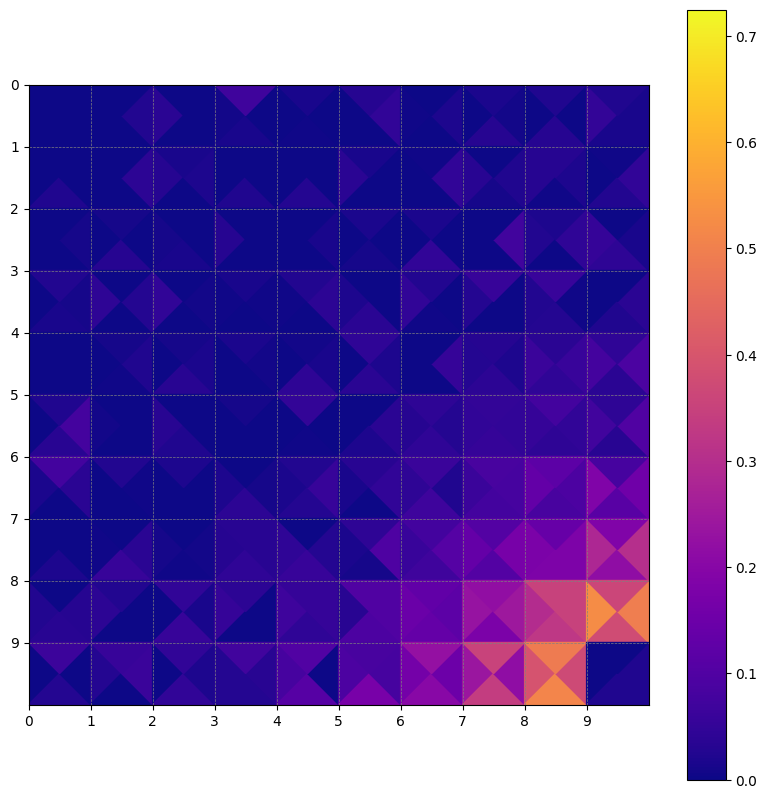

In [4]:
device = torch.device('cuda')
std_fn = get_marginal_prob_std_fn(sigma=25, device=device)
model = DataParallel(ScoreNet(std_fn))
model.load_state_dict(torch.load('qvmap_model_p0.pth', weights_only=True))
diffusion_coeff = get_diffusion_coeff_fn(sigma=25, device=device)

## Generate samples using the specified sampler.
samples = Euler_Maruyama_sampler(model, 
                                 std_fn, 
                                 diffusion_coeff, 
                                 batch_size=16, 
                                 device=device)

## Sample visualization.
samples = samples.clamp(0.0, 1.0)
%matplotlib inline

sample = np.array(samples[0].to(torch.device('cpu')).reshape(4, 100).permute(1, 0))
print(sample.shape)

visualize_value_map(sample, 10)


  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:00<00:00, 736.47it/s]


(100, 4)


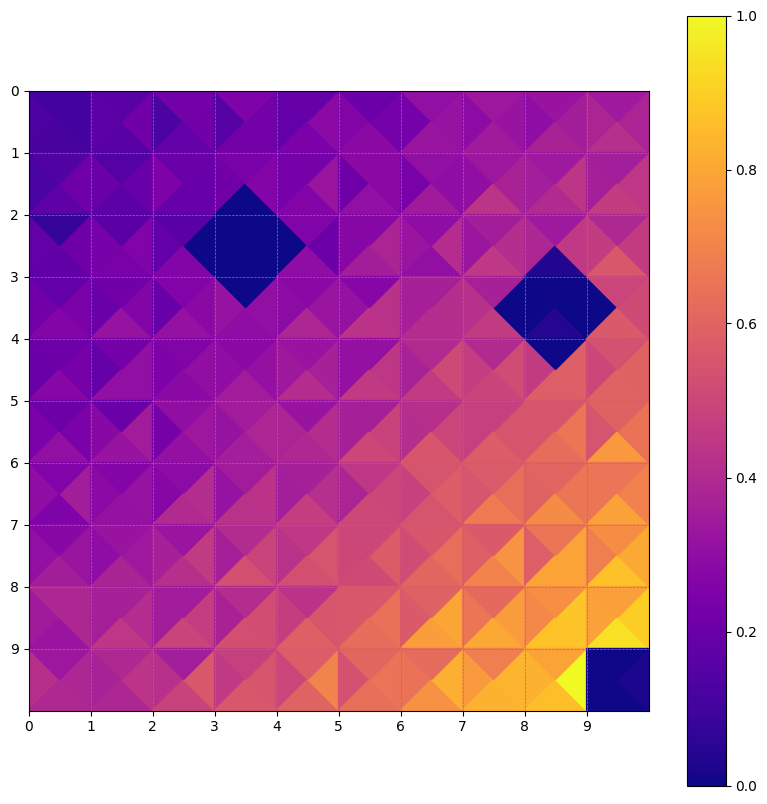

In [11]:
device = torch.device('cuda')
std_fn = get_marginal_prob_std_fn(sigma=25, device=device)
model = DataParallel(ScoreNet(std_fn))
model.load_state_dict(torch.load('qvmap_model_p1.pth', weights_only=True))
diffusion_coeff = get_diffusion_coeff_fn(sigma=25, device=device)

## Generate samples using the specified sampler.
samples = Euler_Maruyama_sampler(model, 
                                 std_fn, 
                                 diffusion_coeff, 
                                 batch_size=16, 
                                 device=device)

## Sample visualization.
samples = samples.clamp(0.0, 1.0)
%matplotlib inline

sample = np.array(samples[0].to(torch.device('cpu')).reshape(4, 100).permute(1, 0))
print(sample.shape)

visualize_value_map(sample, 10)
